In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

# 1.Series

In [2]:
#Series 是一个值的序列，它只有一个列，以及索引
s = pd.Series([1,3,6,np.nan,34,1]) 
s # 默认index从0开始,如果想要按照自己的索引设置，则修改index参数,如:index=[3,4,3,7,8,9]

0     1.0
1     3.0
2     6.0
3     NaN
4    34.0
5     1.0
dtype: float64

In [3]:
s = pd.Series([1,3,6,np.nan,34,1],index=[3,4,3,7,8,9])
s

3     1.0
4     3.0
3     6.0
7     NaN
8    34.0
9     1.0
dtype: float64

# 2.DataFrame 

In [4]:
dates = pd.date_range('2019-03-16',periods=6)
dates

DatetimeIndex(['2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21'],
              dtype='datetime64[ns]', freq='D')

In [5]:
'''
numpy.random.randn(d0, d1, …, dn)是从标准正态分布中返回一个或多个样本值。
numpy.random.rand(d0, d1, …, dn)的随机样本位于[0, 1)中。
(6,4)表示6行4列数据
'''
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
df

,a,b,c,d
2019-03-16,0.804763,-2.138589,0.670569,-0.580333
2019-03-17,-0.376797,-0.195979,-0.457674,-1.728370
2019-03-18,-0.636092,-0.320200,-0.519308,0.680133
2019-03-19,1.001395,-0.789326,-0.016686,-1.681011
2019-03-20,-0.429730,2.069539,1.641863,-1.882122
2019-03-21,-0.973137,-1.015859,-2.007446,0.368298


In [6]:
df['b']

2019-03-16   -2.138589
2019-03-17   -0.195979
2019-03-18   -0.320200
2019-03-19   -0.789326
2019-03-20    2.069539
2019-03-21   -1.015859
Freq: D, Name: b, dtype: float64

In [7]:
#未指定行标签和列标签，默认从0开始索引
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
df1

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [8]:
# 手动填充 
df2 = pd.DataFrame({
    'A': [1,2,3,4],
    'B': pd.Timestamp('20180819'),
    'C': pd.Series([1,6,9,10],dtype='float32'),
    'D': np.array([3] * 4,dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [9]:
df2.index

RangeIndex(start=0, stop=4, step=1)

In [10]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [11]:
df2.values

array([[1, Timestamp('2018-08-19 00:00:00'), 1.0, 3, 'test', 'foo'],
       [2, Timestamp('2018-08-19 00:00:00'), 6.0, 3, 'train', 'foo'],
       [3, Timestamp('2018-08-19 00:00:00'), 9.0, 3, 'test', 'foo'],
       [4, Timestamp('2018-08-19 00:00:00'), 10.0, 3, 'train', 'foo']],
      dtype=object)

In [12]:
df2.describe

<bound method NDFrame.describe of    A          B     C  D      E    F
0  1 2018-08-19   1.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
3  4 2018-08-19  10.0  3  train  foo>

In [13]:
df2.describe() #数据总结

,A,C,D
count,4.000000,4.000000,4.0
mean,2.500000,6.500000,3.0
std,1.290994,4.041452,0.0
min,1.000000,1.000000,3.0
25%,1.750000,4.750000,3.0
50%,2.500000,7.500000,3.0
75%,3.250000,9.250000,3.0
max,4.000000,10.000000,3.0


In [14]:
df2.head() #头部

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [15]:
df2.tail() #尾部

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [16]:
#翻转数据
df2.T

,0,1,2,3
A,1,2,3,4
B,2018-08-19 00:00:00,2018-08-19 00:00:00,2018-08-19 00:00:00,2018-08-19 00:00:00
C,1,6,9,10
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [17]:
'''
axis=1表示行
axis=0表示列
默认ascending(升序)为True
ascending=True表示升序,ascending=False表示降序
下面两行分别表示按行升序与按行降序
'''
df2.sort_index(axis=1,ascending=True)

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [18]:
df2.sort_index(axis=1,ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2018-08-19,1
1,foo,train,3,6.0,2018-08-19,2
2,foo,test,3,9.0,2018-08-19,3
3,foo,train,3,10.0,2018-08-19,4


In [19]:
# 表示按列降序与按列升序
df2.sort_index(ascending=True) #默认axis=0

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [20]:
df2.sort_index(axis=0,ascending=False)

,A,B,C,D,E,F
3,4,2018-08-19,10.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
0,1,2018-08-19,1.0,3,test,foo


In [21]:
# 对特定列数值排列
# 表示对C列降序排列
df2.sort_values(by='C',ascending=False)

,A,B,C,D,E,F
3,4,2018-08-19,10.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
0,1,2018-08-19,1.0,3,test,foo


# 3.pandas选择数据

In [22]:
dates = pd.date_range('20190316',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2019-03-16,0,1,2,3
2019-03-17,4,5,6,7
2019-03-18,8,9,10,11
2019-03-19,12,13,14,15
2019-03-20,16,17,18,19
2019-03-21,20,21,22,23


In [23]:
#选择列
df['A']

2019-03-16     0
2019-03-17     4
2019-03-18     8
2019-03-19    12
2019-03-20    16
2019-03-21    20
Freq: D, Name: A, dtype: int32

In [24]:
df.A

2019-03-16     0
2019-03-17     4
2019-03-18     8
2019-03-19    12
2019-03-20    16
2019-03-21    20
Freq: D, Name: A, dtype: int32

In [25]:
#多行或多列选择
df[0:3]

,A,B,C,D
2019-03-16,0,1,2,3
2019-03-17,4,5,6,7
2019-03-18,8,9,10,11


In [26]:
df['2019-03-16':'2019-03-18']

,A,B,C,D
2019-03-16,0,1,2,3
2019-03-17,4,5,6,7
2019-03-18,8,9,10,11


.loc for label based indexing or
.iloc for positional indexing

In [27]:
# 指定行数据
df.loc['20190316']

A    0
B    1
C    2
D    3
Name: 2019-03-16 00:00:00, dtype: int32

In [28]:
# 指定列
# 两种方式
df.loc[:,'A':'B']

,A,B
2019-03-16,0,1
2019-03-17,4,5
2019-03-18,8,9
2019-03-19,12,13
2019-03-20,16,17
2019-03-21,20,21


In [29]:
df.loc[:,['A','C']] #选择不同的列

,A,C
2019-03-16,0,2
2019-03-17,4,6
2019-03-18,8,10
2019-03-19,12,14
2019-03-20,16,18
2019-03-21,20,22


In [30]:
# 行与列同时检索
df.loc['20190316',['A','B']]

A    0
B    1
Name: 2019-03-16 00:00:00, dtype: int32

In [31]:
df.loc['20190316','A':'B']

A    0
B    1
Name: 2019-03-16 00:00:00, dtype: int32

In [32]:
# 根据序列iloc
# 获取特定位置的值
df.iloc[3,1]

13

In [33]:
df.iloc[3:5,1:3] #不包含末尾5或3，同列表切片

,B,C
2019-03-19,13,14
2019-03-20,17,18


In [34]:
# 跨行操作
df.iloc[[1,3,5],1:3]

,B,C
2019-03-17,5,6
2019-03-19,13,14
2019-03-21,21,22


In [35]:
df.iloc[:3,[0,2]]

,A,C
2019-03-16,0,2
2019-03-17,4,6
2019-03-18,8,10


In [36]:
#通过判断来筛选
df[df.A>8]

,A,B,C,D
2019-03-19,12,13,14,15
2019-03-20,16,17,18,19
2019-03-21,20,21,22,23


In [37]:
df.loc[df.A>8]

,A,B,C,D
2019-03-19,12,13,14,15
2019-03-20,16,17,18,19
2019-03-21,20,21,22,23


1.loc与iloc区别

总结：相同点：都可以索引处块数据

不同点：iloc可以检索对应值,两者操作不同。

In [38]:
print(df.loc['20190316','A':'B'])
print(df.iloc[0,0:2])

A    0
B    1
Name: 2019-03-16 00:00:00, dtype: int32
A    0
B    1
Name: 2019-03-16 00:00:00, dtype: int32


# 4.pandas设置值

In [39]:
dates = pd.date_range('20190316',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2019-03-16,0,1,2,3
2019-03-17,4,5,6,7
2019-03-18,8,9,10,11
2019-03-19,12,13,14,15
2019-03-20,16,17,18,19
2019-03-21,20,21,22,23


In [40]:
# 根据位置设置loc和iloc
df.iloc[2,2] = 111
df.loc['20190316','B'] = 2222
df

,A,B,C,D
2019-03-16,0,2222,2,3
2019-03-17,4,5,6,7
2019-03-18,8,9,111,11
2019-03-19,12,13,14,15
2019-03-20,16,17,18,19
2019-03-21,20,21,22,23


In [41]:
# 根据条件设置
# 更改B中的数，而更改的位置取决于4的位置，并设相应位置的数为0
df.B[df.A>4] = 0
df

,A,B,C,D
2019-03-16,0,2222,2,3
2019-03-17,4,5,6,7
2019-03-18,8,0,111,11
2019-03-19,12,0,14,15
2019-03-20,16,0,18,19
2019-03-21,20,0,22,23


In [42]:
df.B.loc[df.A>4] = 0
df

,A,B,C,D
2019-03-16,0,2222,2,3
2019-03-17,4,5,6,7
2019-03-18,8,0,111,11
2019-03-19,12,0,14,15
2019-03-20,16,0,18,19
2019-03-21,20,0,22,23


In [43]:
# 按行或列设置
# 列批处理，F列全改为NaN
df['F'] = np.nan
df

,A,B,C,D,F
2019-03-16,0,2222,2,3,NaN
2019-03-17,4,5,6,7,NaN
2019-03-18,8,0,111,11,NaN
2019-03-19,12,0,14,15,NaN
2019-03-20,16,0,18,19,NaN
2019-03-21,20,0,22,23,NaN


In [44]:
#添加Series序列(长度必须对齐)
df['E'] = pd.Series([1,2,3,4,5,6],index=pd.date_range('20190316',periods=6))
df

,A,B,C,D,F,E
2019-03-16,0,2222,2,3,NaN,1
2019-03-17,4,5,6,7,NaN,2
2019-03-18,8,0,111,11,NaN,3
2019-03-19,12,0,14,15,NaN,4
2019-03-20,16,0,18,19,NaN,5
2019-03-21,20,0,22,23,NaN,6


In [45]:
#设定某行某列为特定值
df.loc['20190316','A'] = 66
df

,A,B,C,D,F,E
2019-03-16,66,2222,2,3,NaN,1
2019-03-17,4,5,6,7,NaN,2
2019-03-18,8,0,111,11,NaN,3
2019-03-19,12,0,14,15,NaN,4
2019-03-20,16,0,18,19,NaN,5
2019-03-21,20,0,22,23,NaN,6


In [46]:
df.iloc[0,0] = 67
df

,A,B,C,D,F,E
2019-03-16,67,2222,2,3,NaN,1
2019-03-17,4,5,6,7,NaN,2
2019-03-18,8,0,111,11,NaN,3
2019-03-19,12,0,14,15,NaN,4
2019-03-20,16,0,18,19,NaN,5
2019-03-21,20,0,22,23,NaN,6


In [47]:
# 修改一整行数据
df.iloc[1] = np.nan
df

,A,B,C,D,F,E
2019-03-16,67.0,2222.0,2.0,3.0,NaN,1.0
2019-03-17,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18,8.0,0.0,111.0,11.0,NaN,3.0
2019-03-19,12.0,0.0,14.0,15.0,NaN,4.0
2019-03-20,16.0,0.0,18.0,19.0,NaN,5.0
2019-03-21,20.0,0.0,22.0,23.0,NaN,6.0


In [48]:
df.iloc[1]

A   NaN
B   NaN
C   NaN
D   NaN
F   NaN
E   NaN
Name: 2019-03-17 00:00:00, dtype: float64

In [49]:
df.loc['20190316'] = np.nan
df

,A,B,C,D,F,E
2019-03-16,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-17,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18,8.0,0.0,111.0,11.0,NaN,3.0
2019-03-19,12.0,0.0,14.0,15.0,NaN,4.0
2019-03-20,16.0,0.0,18.0,19.0,NaN,5.0
2019-03-21,20.0,0.0,22.0,23.0,NaN,6.0


# 5.处理丢失数据

In [50]:
dates = pd.date_range('20180820',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D']) 
df

,A,B,C,D
2018-08-20,0,1,2,3
2018-08-21,4,5,6,7
2018-08-22,8,9,10,11
2018-08-23,12,13,14,15
2018-08-24,16,17,18,19
2018-08-25,20,21,22,23


In [51]:
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,A,B,C,D
2018-08-20,0,NaN,2.0,3
2018-08-21,4,5.0,NaN,7
2018-08-22,8,9.0,10.0,11
2018-08-23,12,13.0,14.0,15
2018-08-24,16,17.0,18.0,19
2018-08-25,20,21.0,22.0,23


In [52]:
# 删除掉含有NaN的行或列
df.dropna() #默认删除掉含有NaN的行

,A,B,C,D
2018-08-22,8,9.0,10.0,11
2018-08-23,12,13.0,14.0,15
2018-08-24,16,17.0,18.0,19
2018-08-25,20,21.0,22.0,23


In [53]:
df.dropna(
    axis=1, # 0对行进行操作;1对列进行操作
    how='any' # 'any':只要存在NaN就drop掉;默认是any；'all':必须全部是NaN才drop
)

,A,D
2018-08-20,0,3
2018-08-21,4,7
2018-08-22,8,11
2018-08-23,12,15
2018-08-24,16,19
2018-08-25,20,23


In [54]:
# 替换NaN值为0或者其他
df.fillna(value=0)

,A,B,C,D
2018-08-20,0,0.0,2.0,3
2018-08-21,4,5.0,0.0,7
2018-08-22,8,9.0,10.0,11
2018-08-23,12,13.0,14.0,15
2018-08-24,16,17.0,18.0,19
2018-08-25,20,21.0,22.0,23


In [55]:
# 是否有缺失数据NaN
# 是否为空
df.isnull()

,A,B,C,D
2018-08-20,False,True,False,False
2018-08-21,False,False,True,False
2018-08-22,False,False,False,False
2018-08-23,False,False,False,False
2018-08-24,False,False,False,False
2018-08-25,False,False,False,False


In [56]:
# 是否为NaN
df.isna()

,A,B,C,D
2018-08-20,False,True,False,False
2018-08-21,False,False,True,False
2018-08-22,False,False,False,False
2018-08-23,False,False,False,False
2018-08-24,False,False,False,False
2018-08-25,False,False,False,False


In [57]:
# 检测某列是否有缺失数据NaN
df.isnull().any()

A    False
B     True
C     True
D    False
dtype: bool

In [58]:
# 检测数据中是否存在NaN,如果存在就返回True
np.any(df.isnull()==True)

True

# 6.pandas导入导出

In [59]:
data = pd.read_csv('students.csv')
data

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female
3,1103,Tony,24,Male
4,1104,David,20,Male
5,1105,Catty,22,Female
6,1106,M,3,Female
7,1107,N,43,Male
8,1108,A,13,Male
9,1109,S,12,Male


In [60]:
data.head(3) # 默认5行

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female


In [61]:
data.tail(3)

,Student ID,name,age,gender
11,1111,Dw,3,Female
12,1112,Q,23,Male
13,1113,W,21,Female


In [62]:
# 将资料存取成pickle
data.to_pickle('students.pickle')

In [63]:
pd.read_pickle('students.pickle')

,Student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female
3,1103,Tony,24,Male
4,1104,David,20,Male
5,1105,Catty,22,Female
6,1106,M,3,Female
7,1107,N,43,Male
8,1108,A,13,Male
9,1109,S,12,Male


# 7.pandas合并操作

In [64]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
df1

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [65]:
df2

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [66]:
df3

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [67]:
# concat纵向合并
res = pd.concat([df1,df2,df3],axis=0)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [68]:
# 上述合并过程中，index重复，下面给出重置index方法
# 只需要将index_ignore设定为True即可
res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
# 打印结果
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [69]:
pd.concat([df1,df2],axis=1) #横向合并

,a,b,c,d,a,b,c,d
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [70]:
pd.concat([df1,df2],axis=1,ignore_index=True) #横向合并 重置了列表索引

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [71]:
#join 合并方式
df1 = pd.DataFrame(np.ones((3,4)) * 0,columns=['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4)) * 1,columns=['b','c','d','e'],index=[2,3,4])
df1

,a,b,c,d
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0


In [72]:
df2

,b,c,d,e
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [73]:
'''
join='outer',函数默认为join='outer'。此方法是依照column来做纵向合并，有相同的column上下合并在一起，
其他独自的column各自成列，原来没有值的位置皆为NaN填充。
'''
pd.concat([df1,df2],join='outer',axis=0,sort=False) #sort=False 未来版本问题

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [74]:
# join='inner'合并相同的字段
# 纵向"内"合并df1与df2
pd.concat([df1,df2],join='inner',axis=0)

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [75]:
# join_axes(依照axes合并)
pd.concat([df1,df2],axis=1,join_axes=[df1.index]) # 依照df1.index进行横向合并

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [76]:
# 移除join_axes参数,打印结果
pd.concat([df1,df2],axis=1)

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


In [77]:
# append(添加数据)
# append只有纵向合并，没有横向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

In [78]:
df1.append(df2,ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [79]:
df1.append([df2,df3],ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [80]:
df1.append(s1,ignore_index=True)

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


In [81]:
left = pd.DataFrame({'key' : ['K0','K1','K2','K3'],
                     'A' : ['A0','A1','A2','A3'],
                     'B' : ['B0','B1','B2','B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C' : ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [82]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [83]:
#merge 合并
#依据Key column合并，并打印 默认inner方式合并
pd.merge(left,right,on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [84]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [85]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [86]:
# 依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
pd.merge(left,right,on=['key1','key2'],how='inner')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [87]:
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [88]:
pd.merge(left,right,on=['key1','key2'],how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [89]:
pd.merge(left,right,on=['key1','key2'],how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [90]:
#Indicator
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
df1

,col1,col_left
0,0,a
1,1,b


In [91]:
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [92]:
# 依据col1进行合并,并启用indicator=True,最后打印
pd.merge(df1,df2,on='col1',how='outer',indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [93]:
# 自定义indicator column的名称,并打印出
pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [94]:
# 依据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [95]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [96]:
# 依据左右资料集的index进行合并,how='outer',并打印
pd.merge(left,right,left_index=True,right_index=True,how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [97]:
# 依据左右资料集的index进行合并,how='inner',并打印
pd.merge(left,right,left_index=True,right_index=True,how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [98]:
# 解决overlapping的问题
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
boys

,k,age
0,K0,1
1,K1,2
2,K2,3


In [99]:
girls

,k,age
0,K0,4
1,K0,5
2,K3,6


In [100]:
# 使用suffixes解决overlapping的问题
# 比如将上面两个合并时,age重复了,则可通过suffixes设置,以此保证不重复,不同名
pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='inner')

,k,age_boy,age_girl
0,K0,1,4
1,K0,1,5


In [101]:
pd.merge(boys,girls,on='k',how='inner') #不太好判断age是谁的

,k,age_x,age_y
0,K0,1,4
1,K0,1,5


# 8.Pandas plot

In [102]:
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data

0      0.369597
1     -0.602718
2      0.829473
3     -1.290712
4      0.040917
5     -0.733047
6      0.715372
7      0.488906
8      0.852405
9     -1.396088
10     1.124200
11    -0.447750
12    -0.218458
13     0.361012
14     0.617376
15     1.903253
16     0.107131
17     0.797948
18     1.531650
19     0.497011
20     0.067578
21     0.803396
22     0.251468
23     0.825388
24     2.463115
25    -0.310110
26    -1.516468
27    -0.035696
28    -0.181364
29     1.408484
         ...   
970   -0.991023
971    1.426941
972   -0.699308
973   -0.683218
974    1.351281
975   -0.665199
976   -0.348043
977   -0.197478
978    0.179217
979    0.343722
980    0.417796
981   -0.770445
982    1.409864
983   -0.962019
984    1.528707
985   -0.399735
986   -0.561347
987    0.432575
988    0.763415
989   -0.470491
990   -0.440599
991   -1.612793
992    0.989770
993   -0.860361
994   -0.282721
995   -1.870784
996    1.792235
997    0.717650
998   -1.876874
999   -0.223018
Length: 1000, dtype: flo

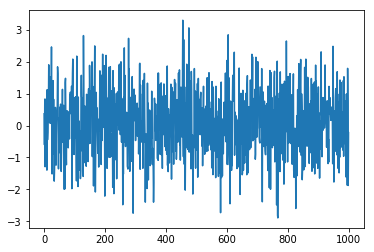

In [103]:
# data本来就是一个数据，所以我们可以直接plot
data.plot()
plt.show()

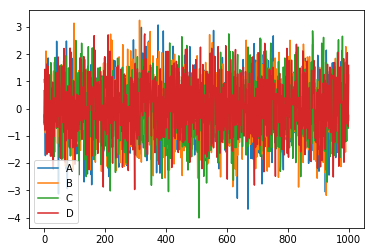

In [104]:
# np.random.randn(1000,4) 随机生成1000行4列数据
# list("ABCD")会变为['A','B','C','D']
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
)
data.cumsum()
data.plot()
plt.show()

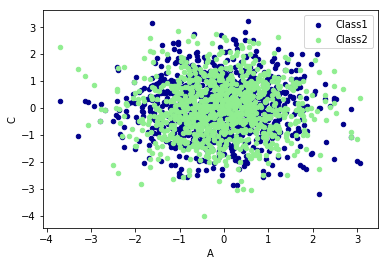

In [105]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将下面这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()